# Предсказание стоимости жилья

<div class="alert alert-info">
    
<b>Комментарий:</b> Доброго времени суток! Возникла сложность, выполнял проект локально. В самом конце возникла ошибка, в результате чего не могу вывести метрики качества линейной регрессии. Не могу понять, где ошибка
</div>

<div style="border:solid purple 2px; padding: 20px"> 

Привет, Иван! 👋

Меня зовут Рустам Муртазин, и я буду делать ревью твоей работы. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

Я не хочу указывать тебе на совершенные тобою ошибки, а хочу поделиться своим опытом и помочь тебе стать настоящим профессионалом и сделать проект еще лучше.

Обрати внимание в первую очередь на те, что помечены <span style="color:red">красным цветом</span>. После их доработки проект будет принят. <span style="color:green">Зеленым цветом</span> отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. <span style="color:orange">Оранжевым цветом</span> выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно). Также в проекте могут быть небольшие «лайфхаки» по Python, не относящиеся к проекту, их я выделил фиолетовым цветом)

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

---

Иван, шикарная работа! Код чистый, структурированный, понятный. По всей работе прослеживается логика принятий решений. Ты демонстрируешь хорошие навыки работы со Spark - и это круто. Верну проект по большей части для того, чтобы была возможность задать вопросы + нужно загрузку данных подправить и написать вывод в конце
    
P.S у меня код нормально прогнался, в конце ошибки не вышло. Возможно рестарт тетрадки помог...


<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Спасибо за быструю доработку комментариев! Я просмотрел твои доработки, там все корректно, так что работу я принимаю. Надеюсь ты учтешь мои комментарии в последующих работах. Благодарю за старания и интерес и желаю успехов в дальнейших проектах 😊

</div>

# Описание проекта

В проекте вам нужно обучить модель линейной регрессии на данных о жилье в Калифорнии в 1990 году. 
В колонках датасета содержатся следующие данные:
- `longitude` — широта;
- `latitude` — долгота;
- `housing_median_age` — медианный возраст жителей жилого массива;
- `total_rooms` — общее количество комнат в домах жилого массива;
- `total_bedrooms` — общее количество спален в домах жилого массива;
- `population` — количество человек, которые проживают в жилом массиве;
- `households` — количество домовладений в жилом массиве;
- `median_income` — медианный доход жителей жилого массива;
- `median_house_value` — медианная стоимость дома в жилом массиве;
- `ocean_proximity` — близость к океану.

На основе данных нужно предсказать медианную стоимость дома в жилом массиве — `median_house_value`. Обучите модель и сделайте предсказания на тестовой выборке. Для оценки качества модели используйте метрики RMSE, MAE и R2.

## Подготовка данных

### Предобработка данных

Импорт необходимых библиотек для работы с данными

In [1]:
# pip install pyspark

In [2]:
!pip install --upgrade pyspark

In [3]:
# import pandas as pd 
import numpy as np
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import isnan, when, count, col
# import pyspark.pandas as ps
# import pyspark.SparkContext as sc
import matplotlib.pyplot as plt
import math
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel


import warnings
warnings.filterwarnings("ignore")

<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> Широкоформатный Jupyter <a class="tocSkip"> </h3>

Расширяем границы, или как сделать работу более комфортной (не всем нравится 😄)

    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:90% !important; }</style>"))

<div class="alert alert-info">
    
<b>Комментарий v.2:</b> Спасибо за совет!
</div>

Инициализация Spark-сессии

In [4]:
spark = SparkSession.builder \
                    .master("local") \
                    .appName("EDA California Housing") \
                    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/23 11:07:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Ознакомление с данными

In [5]:
# df_housing = spark.read.csv('datasets/housing.csv', header=True)
df_housing = spark.read.csv('/datasets/housing.csv', header=True) # код ревьюера
# ps.read_csv('datasets/housing.csv')
df_housing.printSchema()
df_housing.show(5)

root
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- housing_median_age: string (nullable = true)
 |-- total_rooms: string (nullable = true)
 |-- total_bedrooms: string (nullable = true)
 |-- population: string (nullable = true)
 |-- households: string (nullable = true)
 |-- median_income: string (nullable = true)
 |-- median_house_value: string (nullable = true)
 |-- ocean_proximity: string (nullable = true)



+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Вот здесь вышла ошибка 👆  Неправильно указаны пути до файлов. По правилам я должен вернуть такой проект на доработку. Я внес исправления, но будь внимательней в следующий раз. Советую перед финальной отправкой проекта делать `Kernel - Restart and Run All`, это позволит проверить тетрадь на работоспособность и избежать лишних ошибок.

В таком случае предлагаю реализовать загрузку данных с помощью конструкции `try-except` для путей файлов. Например: Try - пути на локальном компьютере, except - пути на сервере. Тогда твой проект будет всегда работать и локально, и в тренажере.

<div class="alert alert-info">
    
<b>Комментарий v.2:</b> Спасибо за комментарий! Приведи, пожалуйста, пример поподробней применения try-except, чтобы знать на будущее.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 ✔️ <a class="tocSkip"> </h2>

Самый простой вариант, это
    
```python
try:
    df_housing = spark.read.csv('datasets/housing.csv', header=True)
except:
    df_housing = spark.read.csv('/datasets/housing.csv', header=True) 
```

Видим, что все столбцы отражены не в корректном виде кроме `ocean_proximity`. Заметно, что данные в столбцах в виде чисел с точками, соответственно, их нужно преобразовать в тип 'double'

In [6]:
for column in df_housing.columns:
    if column != 'ocean_proximity':
        df_housing = df_housing.withColumn(
            column, F.col(column).cast(DoubleType()))
df_housing.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)



<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Да, отлично! Про типы данных в Spark-е дополнительно можно почитать вот [тут](https://spark.apache.org/docs/latest/sql-ref-datatypes.html)

Видим, что столбцы преобразованы в нужный формат данных

Проверим наличие пустых значений в столбцах

In [7]:
df_housing.select(
    [count(
        when(isnan(column) | col(column).isNull(), column)
    ).alias(column) for column in df_housing.columns]).show(vertical=True)

-RECORD 0-----------------
 longitude          | 0   
 latitude           | 0   
 housing_median_age | 0   
 total_rooms        | 0   
 total_bedrooms     | 207 
 population         | 0   
 households         | 0   
 median_income      | 0   
 median_house_value | 0   
 ocean_proximity    | 0   



Обнаружено много пропущенных значений в столбце `total_bedrooms`. 

Выведем медианные значения этого столбца для данных, сгруппированных по столбцу `ocean_proximity`

In [8]:
ocean_proximity_group = df_housing.groupBy('ocean_proximity').agg(F.median('total_bedrooms')).show()
ocean_proximity_group

+---------------+----------------------+
|ocean_proximity|median(total_bedrooms)|
+---------------+----------------------+
|         ISLAND|                 512.0|
|     NEAR OCEAN|                 464.0|
|       NEAR BAY|                 423.0|
|      <1H OCEAN|                 438.0|
|         INLAND|                 423.0|
+---------------+----------------------+



Как можем заметить, что дубликатов у столбца `ocean_proximity` не обнаружено

Перейдем к заполнению пропусков. Указанные выше 2 столбца будут заполняться медианными значениями, сгруппированными по столбцу `ocean_proximity`.

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Процесс заполнения пропусков можно было также реализовать в виде отдельного трансформатора, для этого можно воспользоваться [Imputer](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.Imputer.html)

In [9]:
%%time


def fill_val(df, filter_val, column):
    df_median_bycolumn = df.filter(df.ocean_proximity == filter_val).agg(F.median(column)).collect()
    fill_value = df_median_bycolumn[0].__getitem__(f'median({column})')
    return fill_value


df_housing_2 = df_housing.withColumn('total_bedrooms', when(df_housing.total_bedrooms.isNull(), 
                                                           when(df_housing.ocean_proximity == 'ISLAND', 
                                                                fill_val(df_housing, 'ISLAND', 'total_bedrooms'))
                                                           .when(df_housing.ocean_proximity == 'NEAR OCEAN', 
                                                                fill_val(df_housing, 'NEAR OCEAN', 'total_bedrooms'))
                                                           .when(df_housing.ocean_proximity == 'NEAR BAY', 
                                                                fill_val(df_housing, 'NEAR BAY', 'total_bedrooms'))
                                                           .when(df_housing.ocean_proximity == '<1H OCEAN', 
                                                                fill_val(df_housing, '<1H OCEAN', 'total_bedrooms'))
                                                           .when(df_housing.ocean_proximity == 'INLAND', 
                                                                fill_val(df_housing, 'INLAND', 'total_bedrooms')))
                                                        .otherwise(df_housing.total_bedrooms))
                                     
df_housing_2.select(
    [count(
        when(isnan(column) | col(column).isNull(), column)
    ).alias(column) for column in df_housing.columns]).show(vertical=True)


-RECORD 0-----------------
 longitude          | 0   
 latitude           | 0   
 housing_median_age | 0   
 total_rooms        | 0   
 total_bedrooms     | 0   
 population         | 0   
 households         | 0   
 median_income      | 0   
 median_house_value | 0   
 ocean_proximity    | 0   

CPU times: user 63.7 ms, sys: 10.1 ms, total: 73.8 ms
Wall time: 7.12 s


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

👍

Видим, что пропуски заполнены

**Исследуем данные на выбросы**

Выведем кол-во строк в таблице до удаления выбросов

In [10]:
df_housing_2.count()

20640

Посмотрим, что из себя представляют данные с точки зрения статистики, и проверим наличие выбросов в данных.

In [11]:
df_housing_2.pandas_api().describe()

23/08/23 11:07:53 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.852229,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.390765,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.000000,297.000000,787.000000,280.000000,2.562500,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534700,179700.000000
75%,-118.010000,37.710000,37.000000,3146.000000,643.000000,1724.000000,605.000000,4.742600,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
# type(df_housing_2['ocean_proximity'])
# df_housing_2.dtypes
boxplot_columns = []
for col in df_housing_2.columns:
    if dict(df_housing_2.dtypes)[col] != 'string':
        boxplot_columns.append(col)
print(boxplot_columns)
print(len(boxplot_columns))
#         print(col)
#         df_housing_2.pandas_api()[col].plot.box().show()
        
# print(dict(df_housing.dtypes)['ocean_proximity'])

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
9


In [13]:
def out_boxplot(df, columns):
    num_columns = len(columns)
    num_rows = math.ceil(num_columns / 3)
    fig, axs = plt.subplots(nrows = num_rows, ncols = 3, figsize = (20,15))
    fig.tight_layout(h_pad=num_rows)
    print(fig)
    print(axs)
    i_col = 0
    for row in range(num_rows):
         for column in range(3):
#             print(columns[column])
            i_col = row
            axs[row][column].boxplot(x=columns[column + i_col*3], data=df)
#             axs[row][column].hist(x=columns[column], data=dfs[row])
            axs[row][column].set_xlabel(columns[column + + i_col*3])
#             if row == 0:
#                 axs[row][0].set_ylabel('data_train')
#             elif row == 1:
#                 axs[row][0].set_ylabel('data_test')

Figure(1440x1080)
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


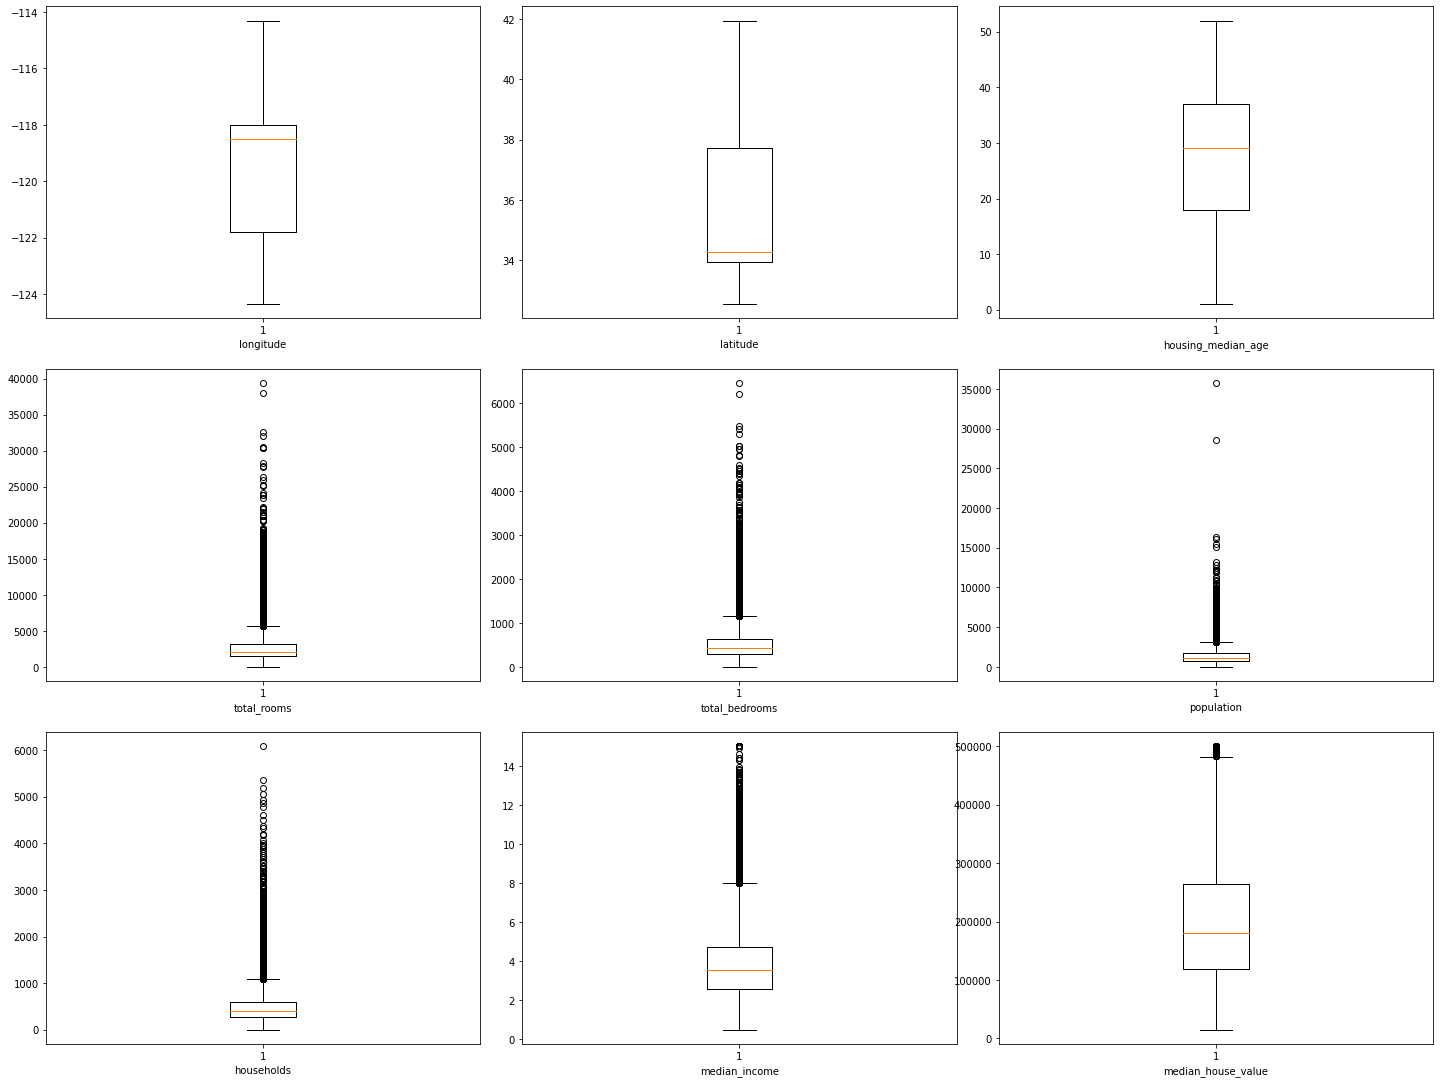

In [14]:
out_boxplot(df_housing_2.pandas_api(), boxplot_columns)

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Кстати, если тебе поднадоел стандартный `matplotlib`, попробуй пострить графики с помощью [plotly](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) - здесь пример с гистограммами

Заметно, что есть выбросы в данных в 5 графиках - `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`

Удалим строки с выбросами с помощью функции, которую фильтрует данные на основании "правила 3 сигм".

In [15]:
def del_outliers(df, columns):
    df_processed = df.pandas_api()
#     print(type(df_processed))
    for column in columns:
        q25 = df_processed[column].quantile(.25)
        q75 = df_processed[column].quantile(.75)        
        q_min = q25 - 1.5*(q75-q25)
        q_max = q75 + 1.5*(q75-q25)
        df_processed = df_processed[df_processed[column] >= q_min]
        df_processed = df_processed[df_processed[column] <= q_max]
    df_processed = df_processed.reset_index(drop=True).to_spark()
    return df_processed

In [16]:
columns_with_outliers = ['total_rooms', 'total_bedrooms', 'population',
                         'households', 'median_income']
df_housing_3 = del_outliers(df_housing_2, columns_with_outliers)

Удаление строк, где спален больше, чем общее количество комнат

In [17]:
df_housing_3 = df_housing_3.filter(
    F.col('total_rooms') >= F.col('total_bedrooms'))

Проверим, что получилось после удаления данных с выбросами

Figure(1440x1080)
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


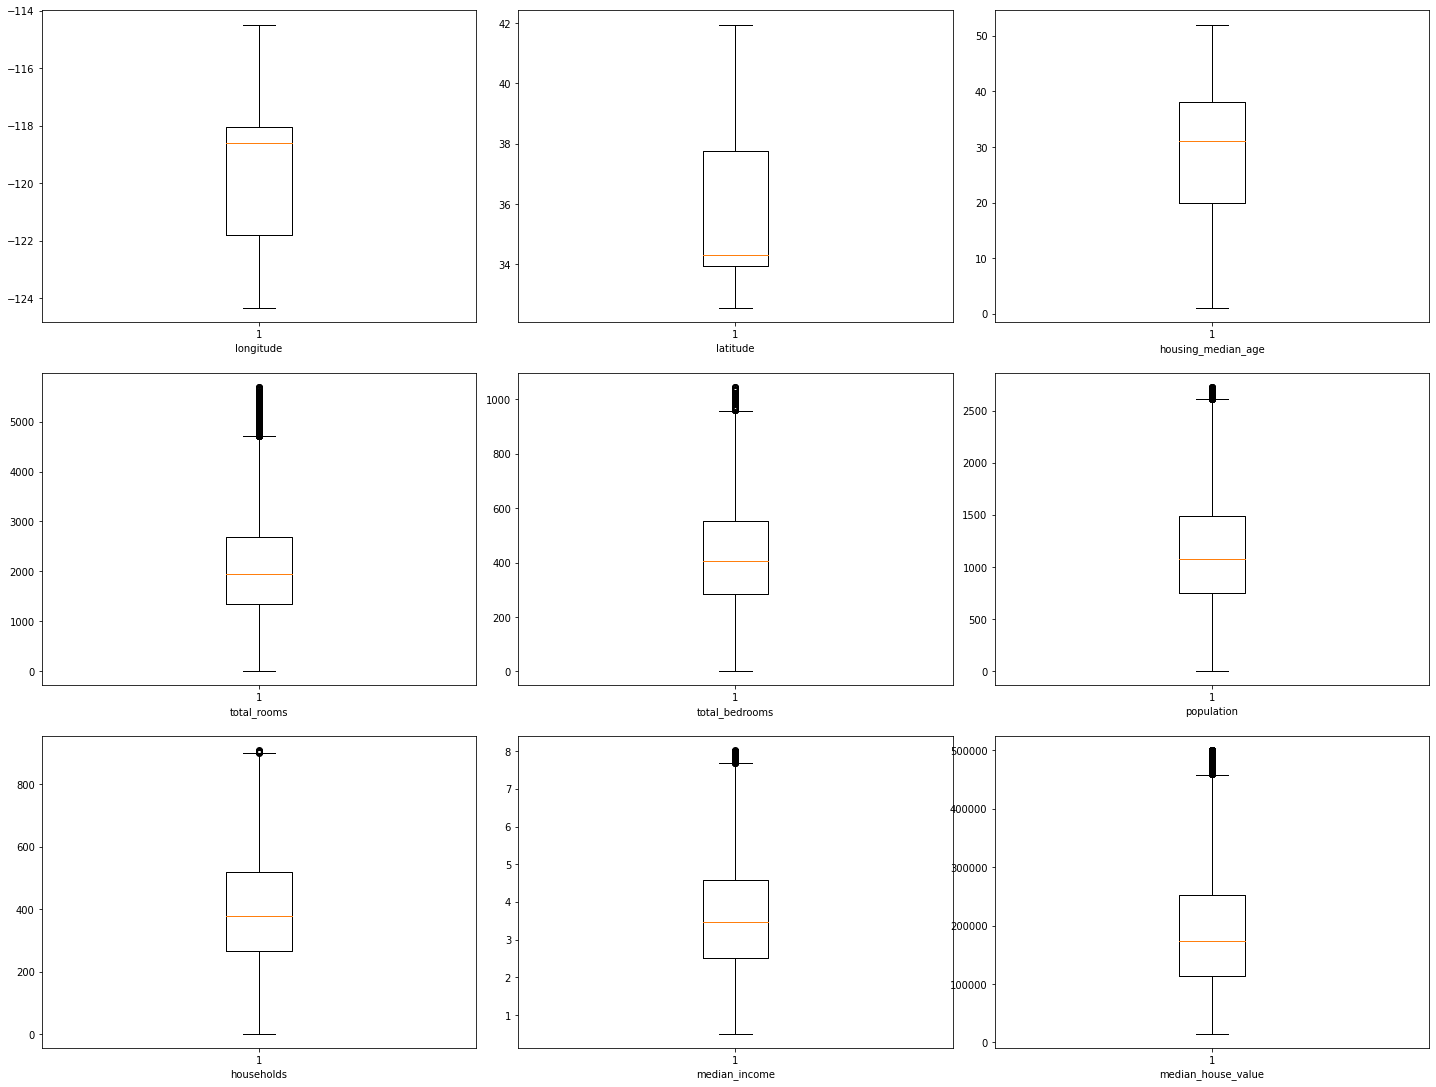

In [18]:
out_boxplot(df_housing_3.pandas_api(), boxplot_columns)

In [19]:
print(f'Кол-во оставшихся строк df_train - {df_housing_3.count()}, удалено - {df_housing_2.count() - df_housing_3.count()}')

Кол-во оставшихся строк df_train - 17529, удалено - 3111


Как можно заметить, что 15% данных отброшено в результате удалений данных с выбросами

<div class="alert alert-warning">
<h2> Комментарий ревьюера ⚠️ <a class="tocSkip"> </h2>

Многовато на самом деле, на практике суммарно по датафреймы мы стараемся не удалять более 10% данных

Создадим несколько новых столбцов с признаками:

- Отношение количества комнат `total_rooms` к количеству домовладений `households` — `rooms_per_household`
- Отношение количества жителей `population` к количеству домовладений `households` — `population_in_household`
- Отношение количества спален `total_bedrooms` к общему количеству комнат `total_rooms`— `bedroom_index`


In [20]:
df_housing_4 = df_housing_3.withColumn('room_per_household',
                                   F.col('total_rooms')/F.col('households'))
df_housing_4 = df_housing_4.withColumn('population_in_household',
                                  F.col('population')/F.col('households'))
df_housing_4 = df_housing_4.withColumn('bedroom_index',
                                  F.col('total_bedrooms')/F.col('total_rooms'))
df_housing_4.show(1)
df_housing_4.printSchema()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+-------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|room_per_household|population_in_household|      bedroom_index|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+-------------------+
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY| 8.288135593220339|     2.8022598870056497|0.12951601908657123|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+----------------

Посмотрим, как данные коррелируют между собой.

In [21]:
df_housing_4.pandas_api().corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_household,population_in_household,bedroom_index
longitude,1.000000,-0.923012,-0.089919,-0.015968,0.022884,0.107200,0.020941,-0.002414,-0.033304,-0.040652,0.134382,0.089380
latitude,-0.923012,1.000000,-0.013168,0.013795,-0.035772,-0.133927,-0.058857,-0.097565,-0.161495,0.121816,-0.127213,-0.111687
housing_median_age,-0.089919,-0.013168,1.000000,-0.267003,-0.200207,-0.177829,-0.170532,-0.138243,0.130647,-0.149588,-0.012670,0.133790
total_rooms,-0.015968,0.013795,-0.267003,1.000000,0.875731,0.754981,0.872956,0.300934,0.188316,0.159819,-0.166902,-0.319496
total_bedrooms,0.022884,-0.035772,-0.200207,0.875731,1.000000,0.804170,0.961712,-0.015758,0.081634,-0.018689,-0.193244,0.079893
population,0.107200,-0.133927,-0.177829,0.754981,0.804170,1.000000,0.854362,-0.000189,-0.052039,-0.130809,0.201944,0.001863
households,0.020941,-0.058857,-0.170532,0.872956,0.961712,0.854362,1.000000,0.028770,0.104869,-0.132532,-0.173940,0.017995
median_income,-0.002414,-0.097565,-0.138243,0.300934,-0.015758,-0.000189,0.028770,1.000000,0.635154,0.275463,-0.069322,-0.588423
median_house_value,-0.033304,-0.161495,0.130647,0.188316,0.081634,-0.052039,0.104869,0.635154,1.000000,0.100605,-0.216824,-0.194980
room_per_household,-0.040652,0.121816,-0.149588,0.159819,-0.018689,-0.130809,-0.132532,0.275463,0.100605,1.000000,-0.043491,-0.361210


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Оставлю ссылку на [материал](https://github.com/hukenovs/coursera_ml_da_specialization/blob/master/C4_Stats_for_data_analysis/Lectures/3-2.Korrelyacii.pdf) про корреляции, может тебе будет интересно)

В данной таблице столбцы `total_bedrooms`, `households` показали очень сильную зависимость друг от друга - 0.961712. Но поскольку во всех домах и квартирах есть комнаты, не говоря уже о спальнях, то следует удалить столбец `total_bedrooms`, т.к. из-за него может некорректно пройти машинное обучение.

Вдобавок необходимо удалить столбцы долготы и широты (`longitude`, `latitude`), т.к. эти данные избыточные из-за наличия данных о близости к океану - `ocean_proximity`

In [22]:
df_housing_5 = df_housing_4.drop('total_bedrooms')
df_housing_5 = df_housing_5.drop('longitude')
df_housing_5 = df_housing_5.drop('latitude')
df_housing_5.show(1)

+------------------+-----------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+-------------------+
|housing_median_age|total_rooms|population|households|median_income|median_house_value|ocean_proximity|room_per_household|population_in_household|      bedroom_index|
+------------------+-----------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+-------------------+
|              52.0|     1467.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY| 8.288135593220339|     2.8022598870056497|0.12951601908657123|
+------------------+-----------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+-------------------+
only showing top 1 row



Удостоверились, что данные столбцы действительно удалены

## Обучение моделей

### Подготовка данных для ML

Разделим данные на обучающие и тестовые в соотношении 3:1 (75%:25%) 

In [23]:
train, test = df_housing_5.randomSplit([.75, .25], seed=12345)
train.count()/df_housing_5.count(), test.count()/df_housing_5.count()

(0.7469336528039249, 0.25306634719607507)

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Сид все же стоит зафиксировать, ведь иначе, при перезапуске тетрадки мы получим другое разбиение

<div class="alert alert-info">
    
<b>Комментарий:</b> Да, заметил, что каждый раз при отсутствии параметра seed получаем разное разбиение, например, увеличился показатель R^2 c 0.6 до 0.61. Установил seed=12345, как и ранее в sklearn random_split=12345
</div>

В машинном обучении через PySpark признаки передаются специальным списком - вектором. Для этого нам потребуется библиотека 'VectorAssembler', которая данные в строке преобразовывает в один вектор.

In [24]:
num_columns = train.columns
num_columns.remove('median_house_value') #признак-ответ
num_columns.remove('ocean_proximity')
num_features = num_columns
num_features

['housing_median_age',
 'total_rooms',
 'population',
 'households',
 'median_income',
 'room_per_household',
 'population_in_household',
 'bedroom_index']

In [25]:
num_vector_assembler = VectorAssembler(inputCols=num_features,
                                             outputCol='num_feature_vector')

train_2 = num_vector_assembler.transform(train)
test_2 = num_vector_assembler.transform(test)

train_2.show(3)
train_2.select('num_feature_vector').take(3)

+------------------+-----------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+-------------------+--------------------+
|housing_median_age|total_rooms|population|households|median_income|median_house_value|ocean_proximity|room_per_household|population_in_household|      bedroom_index|  num_feature_vector|
+------------------+-----------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+-------------------+--------------------+
|               1.0|        6.0|       8.0|       2.0|        1.625|           55000.0|         INLAND|               3.0|                    4.0| 0.3333333333333333|[1.0,6.0,8.0,2.0,...|
|               1.0|       83.0|      32.0|      15.0|        4.875|          141700.0|         INLAND| 5.533333333333333|     2.1333333333333333|0.18072289156626506|[1.0,83.0,32.0,15...|
|               1.0|     2062.0|     872.0|     268.0|      

[Row(num_feature_vector=DenseVector([1.0, 6.0, 8.0, 2.0, 1.625, 3.0, 4.0, 0.3333])),
 Row(num_feature_vector=DenseVector([1.0, 83.0, 32.0, 15.0, 4.875, 5.5333, 2.1333, 0.1807])),
 Row(num_feature_vector=DenseVector([1.0, 2062.0, 872.0, 268.0, 5.2636, 7.694, 3.2537, 0.1663]))]

Проведем масштабирование признаков

In [26]:
scaler = StandardScaler(inputCol='num_feature_vector',
                        outputCol='scaled_num_feature_vector',
                        withStd=True, withMean=True)

scaler = scaler.fit(train_2)

train_3 = scaler.transform(train_2)
test_3 = scaler.transform(test_2)

train_3.show(3)
train_3.select('num_feature_vector').take(3)

+------------------+-----------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+-------------------+--------------------+-------------------------+
|housing_median_age|total_rooms|population|households|median_income|median_house_value|ocean_proximity|room_per_household|population_in_household|      bedroom_index|  num_feature_vector|scaled_num_feature_vector|
+------------------+-----------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+-------------------+--------------------+-------------------------+
|               1.0|        6.0|       8.0|       2.0|        1.625|           55000.0|         INLAND|               3.0|                    4.0| 0.3333333333333333|[1.0,6.0,8.0,2.0,...|     [-2.3485614754644...|
|               1.0|       83.0|      32.0|      15.0|        4.875|          141700.0|         INLAND| 5.533333333333333|     2.133333333333333

[Row(num_feature_vector=DenseVector([1.0, 6.0, 8.0, 2.0, 1.625, 3.0, 4.0, 0.3333])),
 Row(num_feature_vector=DenseVector([1.0, 83.0, 32.0, 15.0, 4.875, 5.5333, 2.1333, 0.1807])),
 Row(num_feature_vector=DenseVector([1.0, 2062.0, 872.0, 268.0, 5.2636, 7.694, 3.2537, 0.1663]))]

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Здорово, что здесь ты ставишь `withMean=True` - так мы реализуем классическую стандатризацию

Переведем столбец `ocean_proximity` в численный тип, где каждое число соответствует уникальному значению, т.к. ML не может работать с данными типа строки и выведем, что получилось

In [27]:
indexer = StringIndexer(inputCol='ocean_proximity',
                        outputCol='ocean_category_index')
indexer = indexer.fit(train_3)
train_4 = indexer.transform(train_3)
test_4 = indexer.transform(test_3)

train_4.show(3)
train_4.select('ocean_category_index').distinct().collect()

+------------------+-----------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+-------------------+--------------------+-------------------------+--------------------+
|housing_median_age|total_rooms|population|households|median_income|median_house_value|ocean_proximity|room_per_household|population_in_household|      bedroom_index|  num_feature_vector|scaled_num_feature_vector|ocean_category_index|
+------------------+-----------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+-------------------+--------------------+-------------------------+--------------------+
|               1.0|        6.0|       8.0|       2.0|        1.625|           55000.0|         INLAND|               3.0|                    4.0| 0.3333333333333333|[1.0,6.0,8.0,2.0,...|     [-2.3485614754644...|                 1.0|
|               1.0|       83.0|      32.0|      15.0|      

[Row(ocean_category_index=0.0),
 Row(ocean_category_index=1.0),
 Row(ocean_category_index=4.0),
 Row(ocean_category_index=3.0),
 Row(ocean_category_index=2.0)]

Проверим тип данных в новом столбце 

In [28]:
train_4.dtypes

[('housing_median_age', 'double'),
 ('total_rooms', 'double'),
 ('population', 'double'),
 ('households', 'double'),
 ('median_income', 'double'),
 ('median_house_value', 'double'),
 ('ocean_proximity', 'string'),
 ('room_per_household', 'double'),
 ('population_in_household', 'double'),
 ('bedroom_index', 'double'),
 ('num_feature_vector', 'vector'),
 ('scaled_num_feature_vector', 'vector'),
 ('ocean_category_index', 'double')]

Закодируем `ocean_category_index` с помощью One-Hot Encoder

In [29]:
ohe = OneHotEncoder(inputCol='ocean_category_index',
                                outputCol='ocean_category_ohe')

ohe = ohe.fit(train_4)

train_5 = ohe.transform(train_4)
test_5 = ohe.transform(test_4)

train_5.show(3)

+------------------+-----------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+-------------------+--------------------+-------------------------+--------------------+------------------+
|housing_median_age|total_rooms|population|households|median_income|median_house_value|ocean_proximity|room_per_household|population_in_household|      bedroom_index|  num_feature_vector|scaled_num_feature_vector|ocean_category_index|ocean_category_ohe|
+------------------+-----------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+-------------------+--------------------+-------------------------+--------------------+------------------+
|               1.0|        6.0|       8.0|       2.0|        1.625|           55000.0|         INLAND|               3.0|                    4.0| 0.3333333333333333|[1.0,6.0,8.0,2.0,...|     [-2.3485614754644...|                 1.0|    

Теперь формируем финальный вектор из строчных и числовых данных, которые уже закодированы и масштабированы.

In [30]:
final_assembler = VectorAssembler(inputCols=['scaled_num_feature_vector',
                                       'ocean_category_ohe'],
                            outputCol='final_feature_vector')

train_6 = final_assembler.transform(train_5)
test_6 = final_assembler.transform(test_5)

train_6.show(3)
train_6.select('final_feature_vector').take(3)

+------------------+-----------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+-------------------+--------------------+-------------------------+--------------------+------------------+--------------------+
|housing_median_age|total_rooms|population|households|median_income|median_house_value|ocean_proximity|room_per_household|population_in_household|      bedroom_index|  num_feature_vector|scaled_num_feature_vector|ocean_category_index|ocean_category_ohe|final_feature_vector|
+------------------+-----------+----------+----------+-------------+------------------+---------------+------------------+-----------------------+-------------------+--------------------+-------------------------+--------------------+------------------+--------------------+
|               1.0|        6.0|       8.0|       2.0|        1.625|           55000.0|         INLAND|               3.0|                    4.0| 0.3333333333333333|[1.0,6.0,

[Row(final_feature_vector=DenseVector([-2.3486, -2.0199, -2.0648, -2.1336, -1.3479, -0.9942, 0.9629, 1.9913, 0.0, 1.0, 0.0, 0.0])),
 Row(final_feature_vector=DenseVector([-2.3486, -1.9448, -2.0211, -2.0638, 0.8215, 0.0772, -0.7396, -0.5753, 0.0, 1.0, 0.0, 0.0])),
 Row(final_feature_vector=DenseVector([-2.3486, -0.0147, -0.4911, -0.7055, 1.0809, 0.9909, 0.2823, -0.8172, 0.0, 1.0, 0.0, 0.0]))]

<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Преобразования я бы рекомендовал в данном случае собрать в общий пайплайн обработки данных, информацию о которой можно найти в [официальной документации](https://spark.apache.org/docs/latest/ml-pipeline.html)

### Обучение модели

Обучать модель с помощью будем с помощью Linear Regression, где параметры будут подбираться с помощи кросс-валидации.

In [31]:
lr = LinearRegression(featuresCol='final_feature_vector',
                      labelCol='median_house_value')
lr

LinearRegression_4c9f91e62612

In [32]:
%%time

grid_search = ParamGridBuilder()\
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .addGrid(lr.fitIntercept, [False, True])\
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])\
    .addGrid(lr.maxIter, [10, 20, 50, 100, 200, 500, 1000])\
    .build()

evaluator = RegressionEvaluator(labelCol='median_house_value')
cv = CrossValidator(estimator=lr, estimatorParamMaps=grid_search, evaluator=evaluator, numFolds=5)

cvModel = cv.fit(train_6)

23/08/23 11:09:14 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/08/23 11:09:14 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


CPU times: user 15 s, sys: 4.81 s, total: 19.8 s
Wall time: 5min 9s


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Шик 👏

Вывод гиперпараметров лучшей модели

In [33]:
cvModel.bestModel.extractParamMap()

{Param(parent='LinearRegression_4c9f91e62612', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 2,
 Param(parent='LinearRegression_4c9f91e62612', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0,
 Param(parent='LinearRegression_4c9f91e62612', name='epsilon', doc='The shape parameter to control the amount of robustness. Must be > 1.0. Only valid when loss is huber'): 1.35,
 Param(parent='LinearRegression_4c9f91e62612', name='featuresCol', doc='features column name.'): 'final_feature_vector',
 Param(parent='LinearRegression_4c9f91e62612', name='fitIntercept', doc='whether to fit an intercept term.'): True,
 Param(parent='LinearRegression_4c9f91e62612', name='labelCol', doc='label column name.'): 'median_house_value',
 Param(parent='LinearRegression_4c9f91e62612', name='loss', doc='The loss function to be optimized. Supported options: squaredError

Добавление результатов предсказаний в обучающие и тестовые данных с их выводом на экран

In [34]:
pred_train = cvModel.transform(train_6).withColumnRenamed('prediction',
                                                      'predicted_median_house_value')

pred_train.pandas_api().head()

,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,room_per_household,population_in_household,bedroom_index,num_feature_vector,scaled_num_feature_vector,ocean_category_index,ocean_category_ohe,final_feature_vector,predicted_median_house_value
0,1.0,6.0,8.0,2.0,1.6250,55000.0,INLAND,3.000000,4.000000,0.333333,"[1.0, 6.0, 8.0, 2.0, 1.625, 3.0, 4.0, 0.333333...","[-2.3485614754644453, -2.0199100425164644, -2....",1.0,"(0.0, 1.0, 0.0, 0.0)","[-2.3485614754644453, -2.0199100425164644, -2....",38463.128195
1,1.0,83.0,32.0,15.0,4.8750,141700.0,INLAND,5.533333,2.133333,0.180723,"[1.0, 83.0, 32.0, 15.0, 4.875, 5.5333333333333...","[-2.3485614754644453, -1.9448117383592753, -2....",1.0,"(0.0, 1.0, 0.0, 0.0)","[-2.3485614754644453, -1.9448117383592753, -2....",157623.954019
2,1.0,2062.0,872.0,268.0,5.2636,191300.0,INLAND,7.694030,3.253731,0.166343,"[1.0, 2062.0, 872.0, 268.0, 5.2636, 7.69402985...","[-2.3485614754644453, -0.014687791254373894, -...",1.0,"(0.0, 1.0, 0.0, 0.0)","[-2.3485614754644453, -0.014687791254373894, -...",172091.932678
3,1.0,2254.0,402.0,112.0,4.2500,189200.0,INLAND,20.125000,3.589286,0.145519,"[1.0, 2254.0, 402.0, 112.0, 4.25, 20.125, 3.58...","[-2.3485614754644453, 0.17257031781290305, -1....",1.0,"(0.0, 1.0, 0.0, 0.0)","[-2.3485614754644453, 0.17257031781290305, -1....",147280.410304
4,2.0,96.0,30.0,16.0,5.3374,47500.0,INLAND,6.000000,1.875000,0.187500,"[2.0, 96.0, 30.0, 16.0, 5.3374, 6.0, 1.875, 0....","[-2.267156598543786, -1.9321328038911785, -2.0...",1.0,"(0.0, 1.0, 0.0, 0.0)","[-2.267156598543786, -1.9321328038911785, -2.0...",183670.684606


In [35]:
pred_test = cvModel.transform(test_6).withColumnRenamed('prediction',
                                                      'predicted_median_house_value')

pred_test.pandas_api().head()

,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,room_per_household,population_in_household,bedroom_index,num_feature_vector,scaled_num_feature_vector,ocean_category_index,ocean_category_ohe,final_feature_vector,predicted_median_house_value
0,2.0,227.0,114.0,49.0,3.1591,434700.0,<1H OCEAN,4.632653,2.326531,0.154185,"[2.0, 227.0, 114.0, 49.0, 3.1591, 4.6326530612...","[-2.267156598543786, -1.8043681565588177, -1.8...",0.0,"(1.0, 0.0, 0.0, 0.0)","[-2.267156598543786, -1.8043681565588177, -1.8...",132825.650942
1,2.0,2530.0,1066.0,510.0,4.6336,187500.0,<1H OCEAN,4.960784,2.090196,0.222134,"[2.0, 2530.0, 1066.0, 510.0, 4.6336, 4.9607843...","[-2.267156598543786, 0.44175384959711367, -0.1...",0.0,"(1.0, 0.0, 0.0, 0.0)","[-2.267156598543786, 0.44175384959711367, -0.1...",261735.027807
2,2.0,2569.0,1232.0,388.0,4.3651,145600.0,<1H OCEAN,6.621134,3.175258,0.167770,"[2.0, 2569.0, 1232.0, 388.0, 4.3651, 6.6211340...","[-2.267156598543786, 0.4797906530014043, 0.164...",0.0,"(1.0, 0.0, 0.0, 0.0)","[-2.267156598543786, 0.4797906530014043, 0.164...",191604.208366
3,2.0,2701.0,1368.0,430.0,4.0710,137400.0,INLAND,6.281395,3.181395,0.196224,"[2.0, 2701.0, 1368.0, 430.0, 4.071, 6.28139534...","[-2.267156598543786, 0.6085306029851572, 0.412...",1.0,"(0.0, 1.0, 0.0, 0.0)","[-2.267156598543786, 0.6085306029851572, 0.412...",123817.228834
4,2.0,4953.0,1791.0,562.0,5.0346,205100.0,INLAND,8.813167,3.186833,0.148395,"[2.0, 4953.0, 1791.0, 562.0, 5.0346, 8.8131672...","[-2.267156598543786, 2.804912173920093, 1.1826...",1.0,"(0.0, 1.0, 0.0, 0.0)","[-2.267156598543786, 2.804912173920093, 1.1826...",156177.159075


Качество модели линейной регрессии

In [36]:
predictions_and_actuals = pred_test[['predicted_median_house_value',
                                        'median_house_value']]
predictions_and_actuals_rdd = predictions_and_actuals.rdd
predictions_and_actuals_rdd.take(5)
# print(type(predictions_and_actuals_rdd))
# predictions_and_actuals_rdd = predictions_and_actuals_rdd.map(tuple)
# print(type(predictions_and_actuals_rdd))
# predictions_and_actuals_rdd.take(2)

metrics = RegressionMetrics(predictions_and_actuals_rdd)

# s = f'''
# Root Mean Squared Error: {metrics.rootMeanSquaredError}
# Mean Absolute Error:     {metrics.meanAbsoluteError}
# R**2:                    {metrics.r2}
# '''

s = '''
Mean Squared Error:      {0}
Root Mean Squared Error: {1}
Mean Absolute Error:     {2}
R**2:                    {3}
'''.format(metrics.meanSquaredError,
           metrics.rootMeanSquaredError,
           metrics.meanAbsoluteError,
           metrics.r2
           )


print(s)


Mean Squared Error:      4475868146.580891
Root Mean Squared Error: 66901.92931882376
Mean Absolute Error:     48621.88575514976
R**2:                    0.6108679141539375



Результаты метрик показали, что модель ML в целом удовлетворительная, об этом говорит показатель r^2 = 0.6108679141539375 > 0.5

## Анализ результатов

В данной работе обучена модель линейной регрессии на данных о жилье в Калифорнии в 1990 году.

На этапе исследования
- считаны данные
- преобразованы все столбцы, кроме `ocean_proximity`, в тип double
- заполнены пустые значения в столбце `total_bedrooms` по медианным значениям, полученных в результате группировки данных по выше упомянутому столбцу
- в результате группировки также удалось провести проверку на дубликаты в столбце `ocean_proximity`, по итогу дубликаты не обнаружены
- были обнаружены выбросы в данных, в результате чего удалены строки с ними по "правилу 3 сигм"
- удалены строки, где спален больше, чем общее количество комнат
- добавлены 3 новых столбца `room_per_household`, `population_in_household`, `bedroom_index` как отношения, соответственно: \
    1) количества комнат `total_rooms` к количеству домовладений `households`  
    2) количества жителей `population` к количеству домовладений `households` \
    3) количества спален `total_bedrooms` к общему количеству комнат `total_rooms`   
- исследованы данные на корреляцию, обнаружена очень сильная взаимозависимость у столбцов `total_bedrooms` и `households` - 0.961712, удалён столбец `total_bedrooms`
- удалены столбцы долготы и широты (`longitude`, `latitude`) из-за наличия данных о близости к океану - `ocean_proximity`

Следующий этап заключался в подготовке данных для обучения модели линейной регрессии
- Данные разбиты на обучающие и тестовые в соотношении 3:1
- Числовые признаки преобразованы в вектора, поскольку pyspark mlib работает только с ними - `num_feature_vector`
- Эти же признаки масштабированы для корректного машинного обучения - `scaled_num_feature_vector`
- столбец `ocean_proximity` преобразован в численный тип, где каждое число соответствует уникальному значению - `ocean_category_index`
- этот же столбец закодирован с помощью One-Hot Encoder - `ocean_category_ohe`
- сформирован конечный вектор путём объединения двух векторов `scaled_num_feature_vector`, `ocean_category_ohe` - `final_feature_vector`, который позволил обучить модель Linear Regression

Заключительный этап заключался, собственно, в обучении модели и исследования её качества. 
- Обучение происходило с помощью кросс-валидации для подбора гиперпараметров лучшей модели
- Добавился столбец с предсказаниями
- Исследование модели путем соотношения ответов и предсказаний с помощью RMSE, MAE и R^2 показало удовлетворительный результат (R^2 ≈ 0.61 > 0.5)

<div class="alert alert-danger">
<h2> Комментарий ревьюера ❌ <a class="tocSkip"> </h2>

Общий вывод все же написать стоит

<div class="alert alert-info">
    
<b>Комментарий v.2:</b> Я это и планировал сделать:) Но после устранения ошибки, связанной с невыводом результаов метрики.
</div>

<div style="border:solid purple 5px; padding: 20px"> 
<h2 align="center"> Рубрика «Питонячий лайфхакер» <a class="tocSkip"> </h2>

<h3> Регулярный выражения <a class="tocSkip"> </h3>

Пару полезных ссылок про regex:

- Статья на [pythonru.com](https://pythonru.com/primery/primery-primeneniya-regulyarnyh-vyrazheniy-v-python) довольно неплохо расписаны примеры
- Шикарная статья на [habr.com](https://habr.com/ru/post/349860/), с подробным объяснением
- Сайт [regex101.com](https://regex101.com/). В нем можно создавать и проверять регулярные выражения, очень удобно

![](https://i.ibb.co/93Rj47w/156231978012113891.jpg)